1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[-2.23035269 -1.95494175 -1.6795308  -1.40411985 -1.12870891 -0.85329796
 -0.57788702 -0.30247607 -0.02706513  0.24834582  0.52375677  0.79916771
  1.07457866  1.3499896   1.62540055  1.90081149  2.17622244  2.45163339
  2.72704433  3.00245528  3.27786622]
Unormalized function integral equals: 4529.889867379163
Normalized function integral equals:  55.08218915895378


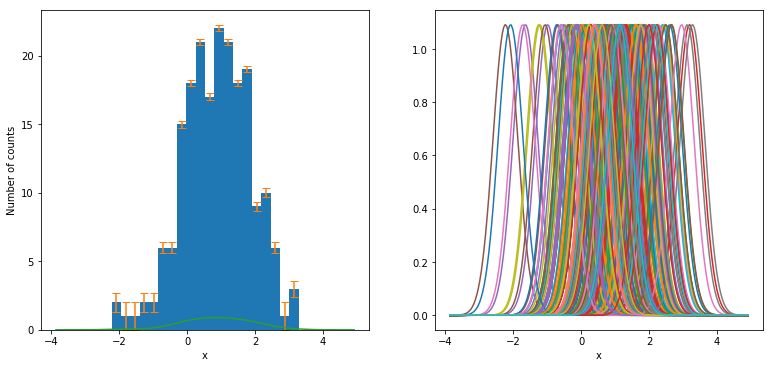

In [11]:
import numpy as np
from scipy import stats
from scipy import integrate
import matplotlib.pyplot as plt

np.random.seed(1235)

N=200
mu, sigma=np.random.rand(), np.random.rand()
#print(mean)
x=np.random.normal(mu, sigma, N)

#Histogram
gridsize = (3, 3)
fig=plt.figure(figsize=(20,20))
ax1 = plt.subplot2grid(gridsize, (1, 0))
ax1.set_ylabel('Number of counts')
ax1.set_xlabel('x')
counts, bins, patches=ax1.hist(x,20)
print(bins)
bin_centers = 0.5*(bins[1:] + bins[:-1])
yint = np.arange(0, max(counts)+max(counts)/10, 5)
plt.yticks(yint)
plt.errorbar(bin_centers, counts, yerr=1/(np.sqrt(counts)), fmt='none', marker='.', capsize=4)

#Gaussians
stdev=1.06*x.std()*(x.size**(-1/5))
points=np.linspace(min(x)-(max(x)/2),max(x)+(max(x)/2),200)
ax2 = plt.subplot2grid(gridsize, (1, 1))
gaussian=np.zeros((len(points),len(x)))
for i in np.arange(len(x)):
    ax2.plot(points,stats.norm.pdf(points,x[i],stdev))
    gaussian[i,:]=stats.norm.pdf(points,x[i],stdev)
ax2.set_xlabel('x')  

pdf=np.sum(gaussian, axis=0)
#ax3 = plt.subplot2grid(gridsize, (2, 0))

pdf_int=scipy.integrate.trapz(pdf)
hist_int=np.sum(counts)*(bins[2] - bins[1])
print('Unormalized function integral equals:',pdf_int)
pdf=pdf*hist_int/pdf_int
pdf_int=scipy.integrate.trapz(pdf)
print('Normalized function integral equals: ',pdf_int)
ax1.plot(points,pdf)



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

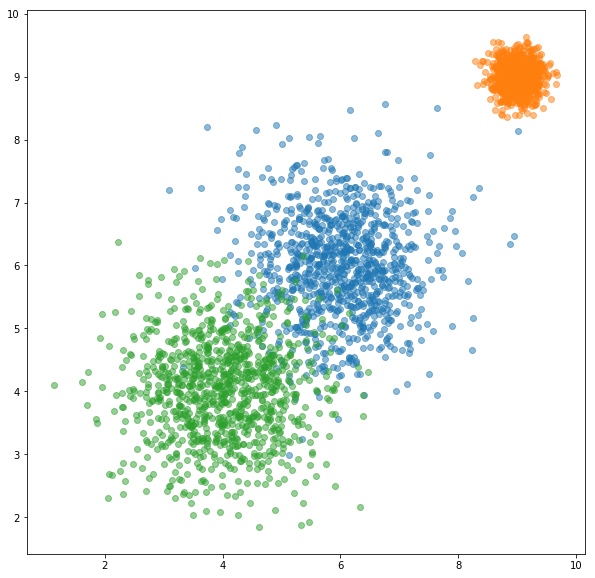

In [76]:
import pandas as pd

def dataset_gen(n, number_of_data):
    df=pd.DataFrame()
    for i in range(n):
        mean_x=np.random.randint(0,10)
        mean_y=np.random.randint(0,10)
        std=np.random.rand()
        x=np.random.normal(mean_x, std, number_of_data)
        y=np.random.normal(mean_x, std, number_of_data)
        label=str(i)
        df['x'+label]=x
        df['y'+label]=y
        
    return df

n=3
number_of_data=1000
df=dataset_gen(n, number_of_data)
fig=plt.figure(figsize=(10,10))
for i in range(0,3):
    string=str(i)
    plt.scatter(x=df['x'+string],y=df['y'+string],marker='o',alpha=0.5)  
plt.show()

--2018-11-28 10:26:32--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2018-11-28 10:26:33--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc3c2c44394e3048e51af2b1778b.dl.dropboxusercontent.com/cd/0/inline/AWdY54x_OSkkfBI2V1cdnJuzx9D3c9Lrq5IbFrj66QgAMcN2Mkuhp7HgnOIUjyqz7ME53ypRf0FB4uNZSfbenDcKkT95VlocHcfX5USADHilBCDW9POTcDWjxzsT6N-ijLReEqbNo-t2zhjSP2qNXyhes22AQBxeTAkU5qgxXjoKDDAllBgp0B6zdJOTGRLvALU/file [segue]
--2018-11-28 10:26:33--  https://uc3c2c44394e3048

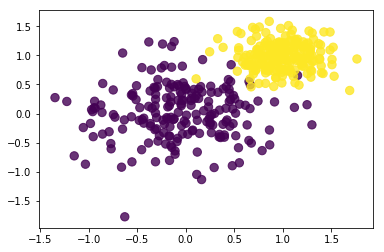

In [148]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [81]:
file_name = "\Users\chime\data\residuals_261.npy"
data=np.load(file_name,mmap_mode='r')
print(data)
#df=pd.DataFrame(data)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<ipython-input-81-3901703348fd>, line 1)